In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import *

from sklearn.ensemble import *


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
Train = pd.read_csv("D:/KAGGLE/HOUSE_PRICE DATA SET/train.csv")
Test = pd.read_csv("D:/KAGGLE/HOUSE_PRICE DATA SET/test.csv")

In [4]:
Train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
Train= Train.drop("Id",axis=1)
Test=Test.drop("Id",axis=1)

In [6]:
X=pd.concat([Train,Test],axis=0)

## 1.Exploration

In [7]:
l_nobject=[]
l_object=[]
for column in Train.columns:
    if Train[column].dtype != "object":
        l_nobject.append(column)
    else:
       l_object.append( column)        

In [8]:
Train_nobject = Train[l_nobject]
nobject_corr = Train_nobject.corr()
nobject_corr_top = nobject_corr.sort_values("SalePrice",ascending=False)["SalePrice"][:10]

In [9]:
nobject_corr_top

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d1a2e75198>)

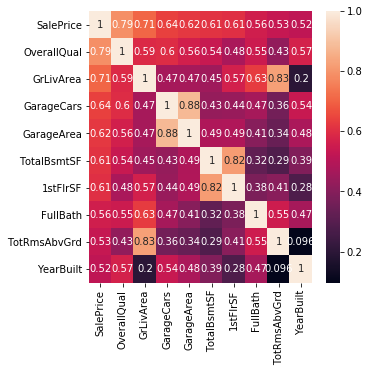

In [10]:
corrmat = Train[list(nobject_corr_top.index)].corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corrmat,annot=True)
plt.show()

## 2. Fill the Missing Data

show the missing values of the train dataset and all the dataset

In [11]:
X1=pd.DataFrame(Train.isnull().sum()[Train.isnull().any()],columns=["values"])
X2=pd.DataFrame(Train[X1.index].dtypes,columns=["types"])
lost_values1=pd.concat([X1,X2],axis=1).sort_values(by=["values","types"],ascending=[False,False]) 
lost_values2=pd.concat([X1,X2],axis=1).sort_values(by="values",ascending=False)

lost_values1 #show the type and the number of missing data(train data)
lost_values2 #show the type and the number of missing data (all the data)

,values,types
PoolQC,1453,object
MiscFeature,1406,object
Alley,1369,object
Fence,1179,object
FireplaceQu,690,object
LotFrontage,259,float64
GarageType,81,object
GarageFinish,81,object
GarageQual,81,object
GarageCond,81,object


,values,types
PoolQC,1453,object
MiscFeature,1406,object
Alley,1369,object
Fence,1179,object
FireplaceQu,690,object
LotFrontage,259,float64
GarageType,81,object
GarageYrBlt,81,float64
GarageFinish,81,object
GarageQual,81,object


In [12]:
def fill_missings(res):

    res['Alley'] = res['Alley'].fillna('missing')
    res['PoolQC'] = res['PoolQC'].fillna(res['PoolQC'].mode()[0])
    res['MasVnrType'] = res['MasVnrType'].fillna('None')
    res['BsmtQual'] = res['BsmtQual'].fillna(res['BsmtQual'].mode()[0])
    res['BsmtCond'] = res['BsmtCond'].fillna(res['BsmtCond'].mode()[0])
    res['FireplaceQu'] = res['FireplaceQu'].fillna(res['FireplaceQu'].mode()[0])
    res['GarageType'] = res['GarageType'].fillna('missing')
    res['GarageFinish'] = res['GarageFinish'].fillna(res['GarageFinish'].mode()[0])
    res['GarageQual'] = res['GarageQual'].fillna(res['GarageQual'].mode()[0])
    res['GarageCond'] = res['GarageCond'].fillna('missing')
    res['Fence'] = res['Fence'].fillna('missing')
    res['Street'] = res['Street'].fillna('missing')
    res['LotShape'] = res['LotShape'].fillna('missing')
    res['LandContour'] = res['LandContour'].fillna('missing')
    res['BsmtExposure'] = res['BsmtExposure'].fillna(res['BsmtExposure'].mode()[0])
    res['BsmtFinType1'] = res['BsmtFinType1'].fillna('missing')
    res['BsmtFinType2'] = res['BsmtFinType2'].fillna('missing')
    res['CentralAir'] = res['CentralAir'].fillna('missing')
    res['Electrical'] = res['Electrical'].fillna(res['Electrical'].mode()[0])
    res['MiscFeature'] = res['MiscFeature'].fillna('missing')
    res['MSZoning'] = res['MSZoning'].fillna(res['MSZoning'].mode()[0])    
    res['Utilities'] = res['Utilities'].fillna('missing')
    res['Exterior1st'] = res['Exterior1st'].fillna(res['Exterior1st'].mode()[0])
    res['Exterior2nd'] = res['Exterior2nd'].fillna(res['Exterior2nd'].mode()[0])    
    res['KitchenQual'] = res['KitchenQual'].fillna(res['KitchenQual'].mode()[0])
    res["Functional"] = res["Functional"].fillna("Typ")
    res['SaleType'] = res['SaleType'].fillna(res['SaleType'].mode()[0])
    res['GarageYrBlt'] = res['GarageYrBlt'].fillna(res['GarageYrBlt'].mode()[0])
 #   res['SaleCondition'] = res['SaleCondition'].fillna('missing')
    #数值型变量的空值先用0值替换
    flist = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                     'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                     'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                     'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                     'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
    for fl in flist:
        res[fl] = res[fl].fillna(0)
    #0值替换   
    res['TotalBsmtSF'] = res['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
    res['2ndFlrSF'] = res['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
    res['GarageArea'] = res['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
    res['GarageCars'] = res['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
    res['LotFrontage'] = res['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
    res['MasVnrArea'] = res['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
    res['BsmtFinSF1'] = res['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)    
    
    return res

X=fill_missings(X)
X.isnull().sum()[X.isnull().any()]

SalePrice    1459
dtype: int64

In [13]:
X = X.drop_duplicates()

In [14]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [15]:
Data1=X[X.SalePrice <= X["SalePrice"].mean()+5*X["SalePrice"].std()] 

In [16]:
Data2=X[X.SalePrice.isnull()==True] #Data2 is the dataset without nan in saleprice

In [17]:
Data3=pd.concat([Data1,Data2],axis=0)

<Figure size 1440x1440 with 0 Axes>

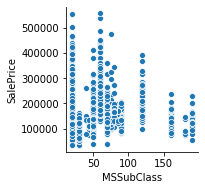

<Figure size 1440x1440 with 0 Axes>

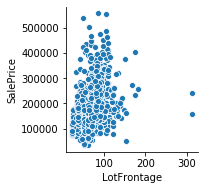

<Figure size 1440x1440 with 0 Axes>

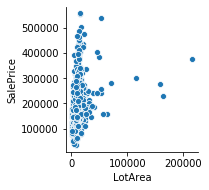

<Figure size 1440x1440 with 0 Axes>

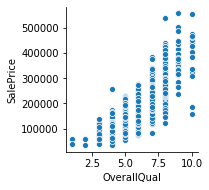

<Figure size 1440x1440 with 0 Axes>

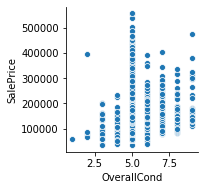

<Figure size 1440x1440 with 0 Axes>

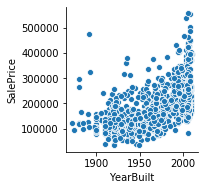

<Figure size 1440x1440 with 0 Axes>

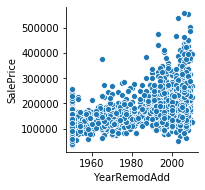

<Figure size 1440x1440 with 0 Axes>

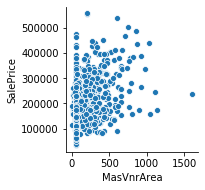

<Figure size 1440x1440 with 0 Axes>

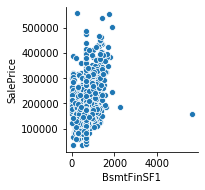

<Figure size 1440x1440 with 0 Axes>

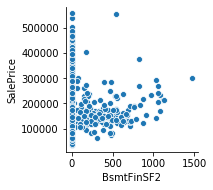

<Figure size 1440x1440 with 0 Axes>

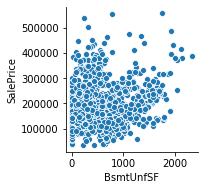

<Figure size 1440x1440 with 0 Axes>

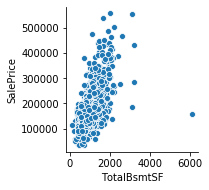

<Figure size 1440x1440 with 0 Axes>

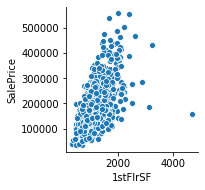

<Figure size 1440x1440 with 0 Axes>

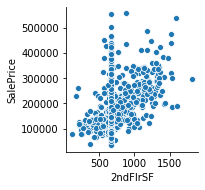

<Figure size 1440x1440 with 0 Axes>

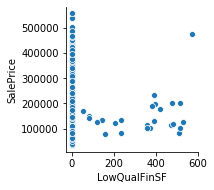

<Figure size 1440x1440 with 0 Axes>

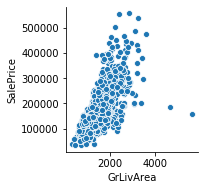

<Figure size 1440x1440 with 0 Axes>

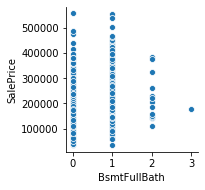

<Figure size 1440x1440 with 0 Axes>

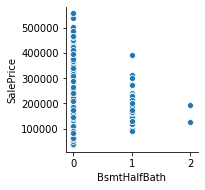

<Figure size 1440x1440 with 0 Axes>

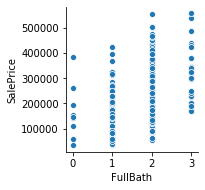

<Figure size 1440x1440 with 0 Axes>

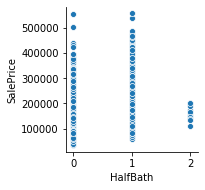

<Figure size 1440x1440 with 0 Axes>

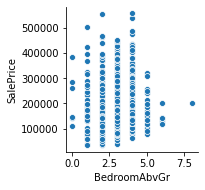

<Figure size 1440x1440 with 0 Axes>

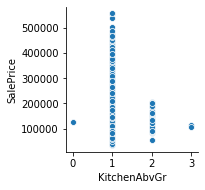

<Figure size 1440x1440 with 0 Axes>

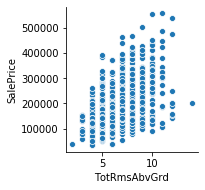

<Figure size 1440x1440 with 0 Axes>

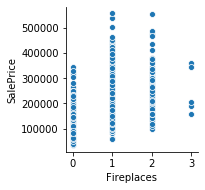

<Figure size 1440x1440 with 0 Axes>

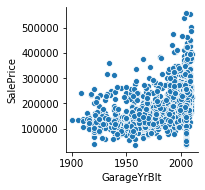

<Figure size 1440x1440 with 0 Axes>

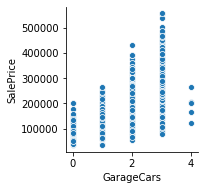

<Figure size 1440x1440 with 0 Axes>

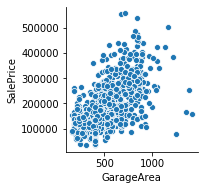

<Figure size 1440x1440 with 0 Axes>

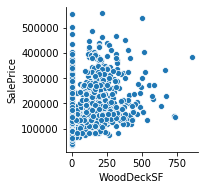

<Figure size 1440x1440 with 0 Axes>

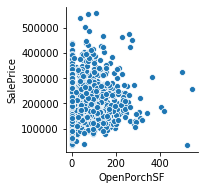

<Figure size 1440x1440 with 0 Axes>

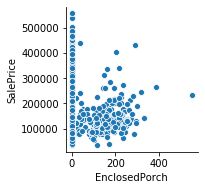

<Figure size 1440x1440 with 0 Axes>

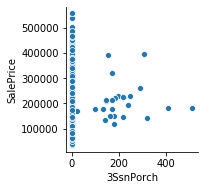

<Figure size 1440x1440 with 0 Axes>

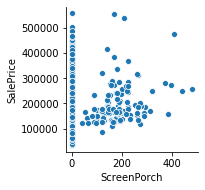

<Figure size 1440x1440 with 0 Axes>

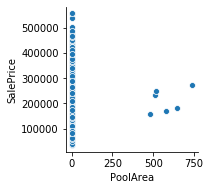

<Figure size 1440x1440 with 0 Axes>

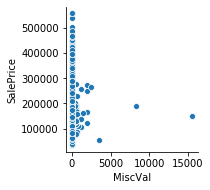

<Figure size 1440x1440 with 0 Axes>

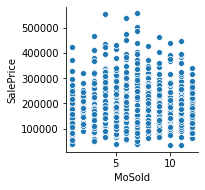

<Figure size 1440x1440 with 0 Axes>

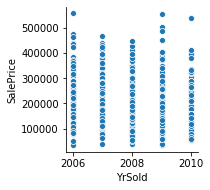

<Figure size 1440x1440 with 0 Axes>

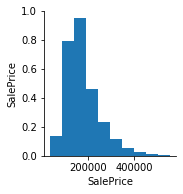

In [18]:
for column in l_nobject:
    figure=plt.figure(figsize=(20,20))
    sns.pairplot(x_vars=[column],y_vars=['SalePrice'],data=Data1,dropna=True)
plt.show()

In [19]:
del_={'1stFlrSF':4,
 '2ndFlrSF':2,
 '3SsnPorch':2,
 'Alley':0,
 'BedroomAbvGr':1,
 'BldgType':0,
 'BsmtCond':0,
 'BsmtExposure':0,
 'BsmtFinSF1':1,
 'BsmtFinSF2':1,
 'LotArea':4,
 'LotConfig':0,
 'LotFrontage':2,
 'MasVnrArea':1,
 'MiscVal':3,
 'TotalBsmtSF':1}

In [20]:
for key,value in del_.items():
    Data1=Data1.sort_values(key,ascending=False)[value:]
Data=pd.concat([Data1,Data2],axis=0)

## 3.Feature Engineering

In [21]:
Data["TotalFlrSF"] = Data["1stFlrSF"]+Data["2ndFlrSF"]
Data["TotalPorch"] = Data["3SsnPorch"]+Data["EnclosedPorch"]+Data["OpenPorchSF"]+Data["ScreenPorch"]
Data["TotalBath"] = Data["HalfBath"]+Data["FullBath"]
Data['YearsSinceRemodel'] = Data['YrSold'].astype(int) - Data['YearRemodAdd'].astype(int)

### (1)sequential coding

In [22]:
from sklearn.preprocessing import *

#### ["ExterQual","ExterCond","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond","PoolQC"]

In [23]:
def QualToInt(data):
    if (data == "Ex"):
        score=5
    elif (data == "Gd"):
        score=4
    elif (data == "TA"):
        score=3
    elif (data == "Fa"):
        score=2
    elif (data == "Po"):
        score=1
    else:
        score=0
    return score

List=["ExterQual","ExterCond","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond","PoolQC"]
for column in List:
    Data[column]=Data[column].apply(QualToInt)

#### ["BsmtFinType1"]

In [26]:
def BsmtTypeToInt(data):
    if (data == 'GLQ'):
        score=6
    elif (data == 'ALQ'):
        score=5
    elif (data == "BLQ"):
        score=4
    elif (data == "Rec"):
        score=3
    elif (data == "LwQ"):
        score=2
    elif (data == "Unf"):
        score=1
    else:
        score=0
    return score
Data["BsmtFinType1"]=Data["BsmtFinType1"].apply(BsmtTypeToInt)
Data["BsmtFinType2"]=Data["BsmtFinType2"].apply(BsmtTypeToInt)

#### ["CentralAir"]

In [30]:
def CentralAirTypeToInt(data):
    if (data == 'Y'):
        score=1
    else:
        score=0
    return score
Data["CentralAir"]=Data["CentralAir"].apply(CentralAirTypeToInt)

#### ["GarageFinish"]

In [29]:
def GarageFinishTypeToInt(data):
    if (data == 'Fin'):
        score=3
    elif (data == "RFn"):
        score=2
    elif (data == "Unf"):
        score=1
    else:
        score=0
    return score
Data["GarageFinish"]=Data["GarageFinish"].apply(GarageFinishTypeToInt)

#### ["Fence"]

In [31]:
def FenceToInt(data):
    if (data == 'GdPrv'):
        score=4
    elif (data == "MnPrv"):
        score=2
    elif (data == "GdWo"):
        score=2
    elif (data == "MnWw"):
        score=1
    else:
        score=0
    return score

Data["Fence"]=Data["Fence"].apply(FenceToInt)

#### ["SaleCondition"]

In [33]:
def SaleConToInt(data):
    if (data == 'Normal'):
        score=6
    elif (data == 'Abnormal'):
        score=5
    elif (data == "AdjLand"):
        score=4
    elif (data == "Alloca"):
        score=3
    elif (data == "Family"):
        score=2
    elif (data == "Partial"):
        score=1
    else:
        score=0
    return score
Data["SaleCondition"]=Data["SaleCondition"].apply(SaleConToInt)

### (2)logarithmetics

In [49]:
Data_=Data.drop(["SalePrice"],axis=1)
Quantitative = [f for f in Data_.columns if Data_.dtypes[f] != 'object'and Data_.dtypes[f] != 'str']

In [50]:
from scipy.stats import norm, skew #for some statistics
skewed_feats = Data_[Quantitative].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skew_list=list(skewness[skewness.Skew>=0.15].index)

In [51]:
def addlogs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res

In [52]:
Data_ = addlogs(Data_, skew_list)

### standardization

In [54]:
for column in Data_.columns:
    if Data_[column].dtypes != "object":
        Data_[column] = (Data_[column]-Data_[column].mean())/Data_[column].std()
    else:
        Data_[column]=Data_[column]

In [55]:
Data_.isnull().sum()[Data_.isnull().any()]

YearsSinceRemodel_log    1
dtype: int64

In [57]:
Data_["YearsSinceRemodel_log"]=Data_["YearsSinceRemodel_log"].fillna(0)

### One-Hot

In [59]:
Data_pre=pd.get_dummies(Data_,columns=Data_.select_dtypes(include=["object"]).columns)

In [60]:
Data_pre.shape

(2892, 287)

### PCA

In [62]:
from sklearn.decomposition import PCA

In [63]:
Data_pre1=Data_pre.copy()

In [76]:
pca = PCA(n_components=0.975,svd_solver="full")
pca = pca.fit(Data_pre1)
x = pca.transform(Data_pre1)

In [77]:
x.shape[1]

85

In [78]:
#name the new features
List=[]

for i in range(x.shape[1]):
    a="Feature"+str(i)
    List.append(a)

Data_=pd.DataFrame(x,columns=[List])

### split dataset

In [81]:
X=Data_
y=Data["SalePrice"]

In [83]:
X["SalePrice"]=list(y)

In [84]:
from sklearn.model_selection import *

In [85]:
target = X.iloc[:, -1]
X_1=X[target.isnull().values == False]
X_2=X[target.isnull().values == True]

In [86]:
y = X_1.iloc[:, -1]
X_1 = X_1.drop("SalePrice",axis=1)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_1,y,test_size=0.1,random_state=666)
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

## 3.Model Building

In [88]:
from sklearn.metrics import mean_squared_error,r2_score

In [89]:
def rmse(yhat,Ytest):
    r_mse=mean_squared_error(yhat,Ytest)**0.5
    return r_mse

### 1. Linear Regression

In [87]:
from sklearn.linear_model import *
from sklearn.model_selection import *

In [90]:
reg = LinearRegression().fit(Xtrain,Ytrain)
yhat=reg.predict(Xtest)
# yhat.reshape(1,215)

In [94]:
def eval_score(yhat,Ytest):
    r_mse = rmse(yhat,Ytest)
    r2_ = r2_score(yhat,Ytest)
    
    print("rmse is: "+str(r_mse))
    print("re_score is: "+str(r2_))

In [95]:
eval_score(yhat,Ytest)

rmse is: 20972.248724016154
re_score is: 0.9043713584658105


### 2.Lasso

In [97]:
alp = np.logspace(-10,0,200,base=10)

lasso_ = LassoCV(alphas=alp
                 ,cv=5).fit(Xtrain,Ytrain)

lasso = Lasso(alpha=lasso_.alpha_).fit(Xtrain,Ytrain)
yhat = lasso.predict(Xtest)

In [98]:
eval_score(yhat,Ytest)

rmse is: 20969.338383651164
re_score is: 0.9043740282221409


In [149]:
print("the best alpha is: "+str(lasso_.alpha_))

the best alpha is: 1.0


### 3.ElasticNet

In [105]:
alp = np.logspace(-10,100,10,base=10)

enet_ = ElasticNetCV(alphas=alp,cv=5).fit(Xtrain,Ytrain)

enet_.alpha_

1e-10

In [106]:
yhat = enet_.predict(Xtest)

In [107]:
eval_score(yhat,Ytest)

rmse is: 20972.248723394892
re_score is: 0.9043713584666686


### 4.RFC

In [108]:
rfc=RandomForestClassifier(random_state=666)
rfc=rfc.fit(Xtrain,Ytrain)

rfc.score(Xtest,Ytest)

0.0

so, I suggest that we should drop this way, the reason is that we use the one-hot code

### 5.XGboost

In [109]:
from xgboost import XGBRegressor as XGBR

In [110]:
xg = XGBR(n_estimators=100).fit(Xtrain,Ytrain)
yhat = xg.predict(Xtest)

[10:57:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [111]:
eval_score(yhat,Ytest)

rmse is: 21314.81571179818
re_score is: 0.8845894368617188


In [113]:
n_estimators=range(50,500,50)
score=[]

for i in n_estimators:
    xg = XGBR(n_estimators=i).fit(Xtrain,Ytrain)
    score.append(xg.score(Xtest,Ytest))

n_estimators[score.index(max(score))]

[10:58:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:59:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:59:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

400

In [114]:
xg = XGBR(n_estimators=400).fit(Xtrain,Ytrain)
yhat = xg.predict(Xtest)

[10:59:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [115]:
eval_score(yhat,Ytest)

rmse is: 21235.650924300306
re_score is: 0.8887444623811745


### 6.RFR

In [151]:
from sklearn.ensemble import *

In [152]:
n_estimators=range(50,500,50)
score=[]

for i in n_estimators:
    regressor = RandomForestRegressor(n_estimators=i).fit(Xtrain,Ytrain)
    score.append(regressor.score(Xtest,Ytest))

n_estimators[score.index(max(score))]

150

In [155]:
regressor = RandomForestRegressor(n_estimators=150)
regressor = regressor.fit(Xtrain,Ytrain)
yhat = regressor.predict(Xtest)

In [156]:
eval_score(yhat,Ytest)

rmse is: 21151.67066701703
re_score is: 0.889638185861914


### 7.Adaboost

In [130]:
loss=["linear","square","exponential"]
learning_rate=np.logspace(-10,0,200,base=10)
n_est=range(50,500,50)

In [123]:
score1=[]
for i in loss:
    ada = AdaBoostRegressor(n_estimators=50,learning_rate=1.0,loss=i)
    ada = ada.fit(Xtrain,Ytrain)
    score1.append(ada.score(Xtest,Ytest))

loss_best=loss[score1.index(max(score1))]
loss_best

'exponential'

In [124]:
score=[]
for i in learning_rate:
    ada = AdaBoostRegressor(n_estimators=50,learning_rate=i,loss=loss_best)
    ada = ada.fit(Xtrain,Ytrain)
    score.append(ada.score(Xtest,Ytest))

l_best = learning_rate[score.index(max(score))]
l_best

1.0

In [131]:
score2=[]
for i in n_est:
    ada = AdaBoostRegressor(n_estimators=i,learning_rate=l_best,loss=loss_best)
    ada = ada.fit(Xtrain,Ytrain)
    score2.append(ada.score(Xtest,Ytest))

n_best = n_est[score2.index(max(score2))]
n_best

250

In [132]:
ada_ = AdaBoostRegressor(n_estimators=n_best,learning_rate=l_best,loss=loss_best)
ada_ = ada.fit(Xtrain,Ytrain)
yhat = ada_.predict(Xtest)

In [133]:
eval_score(yhat,Ytest)

rmse is: 24193.370993627723
re_score is: 0.8587402877112774


In [135]:
print("the best n_estimators is: "+str(n_best))
print("the best learning_rate is: "+str(l_best))
print("the best loss is: "+str(loss_best))

the best n_estimators is: 250
the best learning_rate is: 1.0
the best loss is: exponential


### 8.Bayes Ridge Regression

In [137]:
bayes = BayesianRidge()
bayes = bayes.fit(Xtrain,Ytrain)
yhat=bayes.predict(Xtest)

In [139]:
eval_score(yhat,Ytest)

rmse is: 20845.407976387916
re_score is: 0.9039144286649212


### 9.Grandient Boosting

In [140]:
loss=['ls', 'lad', 'huber', 'quantile']
n_estimators=range(50,500,50)

In [141]:
score=[]
for i in loss:
    gb = GradientBoostingRegressor(loss=i)
    gb = gb.fit(Xtrain,Ytrain)
    score.append(gb.score(Xtest,Ytest))

l_best = loss[score.index(max(score))]

In [142]:
score=[]
for i in n_estimators:
    gb = GradientBoostingRegressor(loss=l_best,n_estimators=i)
    gb = gb.fit(Xtrain,Ytrain)
    score.append(gb.score(Xtest,Ytest))

n_best = n_estimators[score.index(max(score))]

In [143]:
gb = GradientBoostingRegressor(loss=l_best,n_estimators=n_best)
gb = gb.fit(Xtrain,Ytrain)
yhat = gb.predict(Xtest)

In [144]:
eval_score(yhat,Ytest)

rmse is: 20349.237294330742
re_score is: 0.9011999202454118


In [145]:
print("the best n_estimators is: "+str(n_best))
print("the best loss is: "+str(l_best))

the best n_estimators is: 350
the best loss is: ls


### 10. MLPRegression

In [147]:
from sklearn.neural_network import *

In [148]:
mlpr = MLPRegressor().fit(Xtrain,Ytrain)
yhat = mlpr.predict(Xtest)

eval_score(yhat,Ytest)

rmse is: 191373.12660865075
re_score is: -46475.95686583992


For the reason that rmse is large, so I suggest not using this model

By this time, I have evaluated 10 models, and finally pick up 8 of them:

1.LinearRegression <p> 
2.Lasso               lasso_.alpha_ = 1.0<p> 
3.ElasticNet            enet_.alpha_ = 1e-10<p> 
4.AdaBoostRegressor       n_estimators=250,learning_rate=1.0,loss="exponential"<p> 
5.BayesianRidge<p>
6.RFR<p> 
7.GradientBoostingRegressor    loss="ls",n_estimators=350<p> 
8.XGBR                 (n_estimators=400)<p>



## 4.Stacking

In [157]:
rgc = LinearRegression()
la  = Lasso(alpha = lasso_.alpha_)
ela = ElasticNet(alpha = 1e-10)
rfr = RandomForestRegressor(n_estimators=150)
ada = AdaBoostRegressor(n_estimators=250,learning_rate=1.0,loss="exponential")
bayes = BayesianRidge()
gbr = GradientBoostingRegressor(loss="ls",n_estimators=350)
xg = XGBR(n_estimators=350)

In [158]:
model=[rgc,la,ela,rfr,ada,bayes,gbr,xg]

In [159]:
from mlxtend.regressor import StackingCVRegressor

In [162]:
Xtrain1 = Xtrain
Xtrain = Xtrain.reset_index(drop=True)

In [187]:
stacked = StackingCVRegressor(regressors=[rgc,la,ela,rfr,ada,bayes,gbr]
                             ,meta_regressor=xg
                             ,use_features_in_secondary=True)

In [188]:
stacked = stacked.fit(Xtrain,Ytrain) 
yhat = stacked.predict(Xtest)

eval_score(yhat,Ytest)

[12:48:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse is: 19834.22125926862
re_score is: 0.9077869880014173


In [189]:
X_2_features = X_2.drop("SalePrice",axis=1)
YHAT = stacked.predict(X_2_features)
YHAT = pd.DataFrame(YHAT)

In [192]:
YHAT.to_csv(r"C:\Users\Administrator\Desktop\kaggle\predict.csv")